# **Install Spark**

In [ ]:
!apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [46.6 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,013 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,186 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [49.8 kB]
Get:13 http://archive.ubun

In [ ]:
pip install pyspark_dist_explore

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=e0f276319c15b5e2365d9f60182880890263eb934f42ff83f8c44e89d449cb05
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


***Spark SQL***

In [ ]:
pip install pyspark[sql]

***pandas API on Spark***

In [ ]:
pip install pyspark[pandas_on_spark] plotly

***Spark Connect***

In [ ]:
pip install pyspark[connect]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.4/294.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 24.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.59.0
    Uninstalling grpcio-1.59.0:
      Successfully uninstalled grpcio-1.59.0
  Attempting uninstall: grpcio-status
    Found existing installation: grpcio-status 1.48.2
    Uninstalling grpcio-status-1.48.2:
      Successfully uninstalled grpcio-status-1.48.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.25.0 which is incompatible.


In [ ]:
import pyspark
print(pyspark.__version__)

3.5.0


# **1.1 Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from collections import Counter
from numpy import where
from sklearn.model_selection import train_test_split

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
from pyspark import SparkContext
from pyspark.mllib.linalg import Vectors, Matrices
from pyspark.mllib.stat import Statistics

In [ ]:
from pyspark.sql.functions import *
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, isnan, when, count, split, array
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.2 Import Data**

https://stackoverflow.com/questions/64147246/pyspark-need-to-show-a-count-of-null-empty-values-per-each-column-in-a-datafram

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

#Adding API code here
!kaggle datasets download -d claudiodavi/superhero-set

!unzip /content/superhero-set.zip  && rm /content/superhero-set.zip

Mounted at /content/gdrive
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/Kaggle. Or use the environment method.
unzip:  cannot find or open /content/superhero-set.zip, /content/superhero-set.zip.zip or /content/superhero-set.zip.ZIP.


In [ ]:
file_path = "/content/gdrive/MyDrive/Big Data/application_data.csv"
df_app = spark.read.options(header="true",inferschema = "true").csv(file_path)

file_path = "/content/gdrive/MyDrive/Big Data/previous_applications.csv"
df_pv_app = spark.read.options(header="true",inferschema = "true").csv(file_path)

df_app.show()
df_pv_app.show()

+----------+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+--------------------+--------------------+--------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+-----------+----------+--------------+---------------+----------------+----------+----------+---------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+--------------------+-------------------+-------------------+-------------------+--------------+----------------+---------------------------+------------------+--------------+-------------+-------------+-------------+-------------+------------+--------------------+--------------+------------

# **1.3Remove Null**

In [ ]:
df_app.printSchema()

root
 |-- SK_ID_CURR: integer (nullable = true)
 |-- TARGET: integer (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- AMT_CREDIT: double (nullable = true)
 |-- AMT_ANNUITY: double (nullable = true)
 |-- AMT_GOODS_PRICE: double (nullable = true)
 |-- NAME_TYPE_SUITE: string (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- REGION_POPULATION_RELATIVE: double (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- DAYS_REGISTRATION: double (nullable = true)
 |-- DAYS_ID_PUBLISH: integer (nullable = true)
 |-- OWN_CAR_AG

In [ ]:
# นับจำนวนค่า null หรือ NaN ในแต่ละคอลัมน์
df_app.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_app.columns]).show()

+----------+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+----------------+-------------------+------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+-----------+----------+--------------+---------------+----------------+----------+----------+---------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+-----------------+------------+------------+------------+--------------+----------------+---------------------------+---------------+--------------+-------------+-------------+-------------+-------------+------------+--------------------+--------------+-----------------------+-----------------+----

In [ ]:
# Create a SparkSession
spark = SparkSession.builder.appName("application").getOrCreate()

# Assuming df_app is a Spark DataFrame
# Calculate the percentage of missing values in each column
missing_percentage = df_app.agg(*[(F.sum(col(c).isNull().cast("int")) / F.count("*") * 100).alias(c) for c in df_app.columns])

# Convert the resulting DataFrame to a single row
missing_percentage_row = missing_percentage.select([F.lit(1)] + [col(c) for c in df_app.columns])

# Calculate the total number of rows
total_rows = df_app.count()

# Filter columns where null values are less than or equal to 50%
selected_columns = [c for c in df_app.columns if missing_percentage_row.collect()[0][c] < 50]

# Select only the columns that meet the criteria
df_app_clean = df_app.select(*selected_columns)

# Show the percentage of missing values in ascending order
missing_percentage_row.select(*[col(c).alias(c) for c in df_app.columns]).show()

# Show the shape of the cleaned DataFrame
print(f"Shape of df_app_clean: ({df_app_clean.count()}, {len(df_app_clean.columns)})")



+----------+------+------------------+-----------+------------+---------------+------------+----------------+----------+--------------------+-------------------+-------------------+----------------+-------------------+------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+----------------+----------+--------------+---------------+----------------+----------+----------+------------------+--------------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+-----------------+------------------+-------------------+------------------+-----------------+-----------------+---------------------------+-----------------+-----------------+-----------------+----------------+-----------------+-----------------+------------------+---



---


**Some columns have negative age details in days, we will need to convert them into Years data type.We will use user defined function for this**

---



In [ ]:
from pyspark.sql.functions import abs

df_app_clean = df_app_clean.withColumn('DAYS_BIRTH', (abs(col('DAYS_BIRTH')) / 365).cast('int'))
df_app_clean = df_app_clean.withColumn('DAYS_EMPLOYED', (abs(col('DAYS_EMPLOYED')) / 365).cast('int'))
df_app_clean = df_app_clean.withColumn('DAYS_REGISTRATION', (abs(col('DAYS_REGISTRATION')) / 365).cast('int'))
df_app_clean = df_app_clean.withColumn('DAYS_ID_PUBLISH', (abs(col('DAYS_ID_PUBLISH')) / 365).cast('int'))
df_app_clean = df_app_clean.withColumn('DAYS_LAST_PHONE_CHANGE', (abs(col('DAYS_LAST_PHONE_CHANGE')) / 365).cast('int'))

df_app_clean.show()

+----------+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+--------------------+--------------------+--------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+----------+--------------+---------------+----------------+----------+----------+---------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+--------------------+-------------------+-------------------+---------------------------+-------------+----------------------------+--------------+----------------------------+--------------+--------------+-------------------+------------------------+------------------------+------------------------+---

In [ ]:
# แปลงวันเป็นปีสำหรับคอลัมน์ที่เกี่ยวข้องและแทนที่ข้อมูลในคอลัมน์เดิม
df_app_clean = df_app_clean.withColumn('DAYS_BIRTH', (col('DAYS_BIRTH') / 365).cast('int'))
df_app_clean = df_app_clean.withColumn('DAYS_EMPLOYED', (col('DAYS_EMPLOYED') / 365).cast('int'))
df_app_clean = df_app_clean.withColumn('DAYS_REGISTRATION', (col('DAYS_REGISTRATION') / 365).cast('int'))
df_app_clean = df_app_clean.withColumn('DAYS_ID_PUBLISH', (col('DAYS_ID_PUBLISH') / 365).cast('int'))
df_app_clean = df_app_clean.withColumn('DAYS_LAST_PHONE_CHANGE', (col('DAYS_LAST_PHONE_CHANGE') / 365).cast('int'))

# Show the updated DataFrame
df_app_clean.show()



+----------+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+--------------------+--------------------+--------------------+-----------------+--------------------------+----------+-------------+-----------------+---------------+----------+--------------+---------------+----------------+----------+----------+---------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+--------------------+-------------------+-------------------+---------------------------+-------------+----------------------------+--------------+----------------------------+--------------+--------------+-------------------+------------------------+------------------------+------------------------+---

In [ ]:
# Show the shape of the cleaned DataFrame
print(f"Shape of df_app_clean: ({df_app_clean.count()}, {len(df_app_clean.columns)})")

Shape of df_app_clean: (307511, 81)


# **1.4Drop Column**

In [ ]:
# Select the columns you want to keep and create a new DataFrame
df_app_clean = df_app_clean.select('SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
                                   'FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                                   'AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                   'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','FLAG_MOBIL','FLAG_EMP_PHONE',
                                   'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS',
                                   'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                                   'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
                                   'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE',
                                   'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                                   'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                   'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OCCUPATION_TYPE','TOTALAREA_MODE',
                                   'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE')
# Show the updated DataFrame
df_app_clean.show()


+----------+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+--------------------+--------------------+--------------------+-----------------+--------------------------+----------+--------------+---------------+----------------+----------+----------+---------------+--------------------+---------------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+--------------------+------------------------+------------------------+------------------------+------------------------+----------------------+--------------------------+-------------------------+--------------------------+-------------------------+-------------------------+--------------------------+---------------+--------------+----------+-------------+-----------------+---------------+----------------------+
|SK_ID_CURR|TARGET|NAME_CONTR

In [ ]:
print(f"Shape of df_app_clean: ({df_app_clean.count()}, {len(df_app_clean.columns)})")

Shape of df_app_clean: (307511, 50)


In [ ]:
# Group by YEARS_EMPLOYED and count the occurrences of each value
result = df_app_clean.groupBy('DAYS_EMPLOYED').agg(count("*").alias("count"))

# Show the result
result.show()


+-------------+------+
|DAYS_EMPLOYED| count|
+-------------+------+
|            2| 55374|
|            0|252137|
+-------------+------+



In [ ]:
# Replace 1000 years of employment with null (NaN)
df_app_clean = df_app_clean.withColumn('DAYS_EMPLOYED', when(col('DAYS_EMPLOYED') == 1000, None).otherwise(col('DAYS_EMPLOYED')))

# Show the updated DataFrame
df_app_clean.show()


+----------+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+--------------------+--------------------+--------------------+-----------------+--------------------------+----------+--------------+---------------+----------------+----------+----------+---------------+--------------------+---------------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+--------------------+------------------------+------------------------+------------------------+------------------------+----------------------+--------------------------+-------------------------+--------------------------+-------------------------+-------------------------+--------------------------+---------------+--------------+----------+-------------+-----------------+---------------+----------------------+
|SK_ID_CURR|TARGET|NAME_CONTR

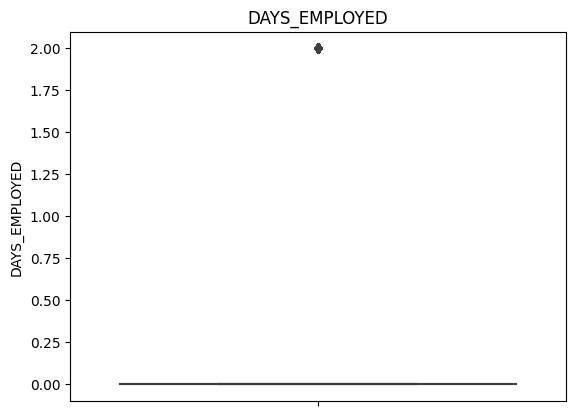

In [ ]:
# Assuming df_app_clean is a Spark DataFrame
# Select the 'YEARS_EMPLOYED' column
selected_column = df_app_clean.select('DAYS_EMPLOYED')

# Convert the Spark DataFrame column to a pandas DataFrame
pandas_df = selected_column.toPandas()

# Create a boxplot using Seaborn
sns.boxplot(y='DAYS_EMPLOYED', data=pandas_df)
plt.title('DAYS_EMPLOYED')
plt.show()


In [ ]:
# ใช้คำสั่ง groupBy และ count ในการนับความถี่ของค่าในคอลัมน์ ORGANIZATION_TYPE
result_or = df_app_clean.groupBy("ORGANIZATION_TYPE").count().alias("count").orderBy(col("count").desc())

In [ ]:
result_or.show()

+--------------------+-----+
|   ORGANIZATION_TYPE|count|
+--------------------+-----+
|Business Entity T...|67992|
|                 XNA|55374|
|       Self-employed|38412|
|               Other|16683|
|            Medicine|11193|
|Business Entity T...|10553|
|          Government|10404|
|              School| 8893|
|       Trade: type 7| 7831|
|        Kindergarten| 6880|
|        Construction| 6721|
|Business Entity T...| 5984|
|   Transport: type 4| 5398|
|       Trade: type 3| 3492|
|    Industry: type 9| 3368|
|    Industry: type 3| 3278|
|            Security| 3247|
|             Housing| 2958|
|   Industry: type 11| 2704|
|            Military| 2634|
+--------------------+-----+
only showing top 20 rows



In [ ]:
# Replace 'XNA' with NaN in the DataFrame
df_app_clean = df_app_clean.withColumn('ORGANIZATION_TYPE', when(col('ORGANIZATION_TYPE') == 'XNA', None).otherwise(col('ORGANIZATION_TYPE')))

# Show the updated DataFrame
df_app_clean.show()


+----------+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+--------------------+--------------------+--------------------+-----------------+--------------------------+----------+--------------+---------------+----------------+----------+----------+---------------+--------------------+---------------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+--------------------+------------------------+------------------------+------------------------+------------------------+----------------------+--------------------------+-------------------------+--------------------------+-------------------------+-------------------------+--------------------------+---------------+--------------+----------+-------------+-----------------+---------------+----------------------+
|SK_ID_CURR|TARGET|NAME_CONTR

In [ ]:
#ทำให้เป็น Array
df_app_clean = df_app_clean.withColumn('ORGANIZATION_TYPE', when(col('ORGANIZATION_TYPE') == 'XNA', None).otherwise(array(col('ORGANIZATION_TYPE'))))

# **1.5 Analysis Application Data**

Univariate & Multi-variate Analysis of Application Data

In [ ]:
if isinstance(df_app, pd.DataFrame):
    print("df_app is a Pandas DataFrame.")
else:
    print("df_app is not a Pandas DataFrame.")


df_app is not a Pandas DataFrame.


In [ ]:
print(df_app.head())  # แสดงบางส่วนของข้อมูลใน Pandas DataFrame


Row(SK_ID_CURR=100002, TARGET=1, NAME_CONTRACT_TYPE='Cash loans', CODE_GENDER='M', FLAG_OWN_CAR='N', FLAG_OWN_REALTY='Y', CNT_CHILDREN=0, AMT_INCOME_TOTAL=202500.0, AMT_CREDIT=406597.5, AMT_ANNUITY=24700.5, AMT_GOODS_PRICE=351000.0, NAME_TYPE_SUITE='Unaccompanied', NAME_INCOME_TYPE='Working', NAME_EDUCATION_TYPE='Secondary / secondary special', NAME_FAMILY_STATUS='Single / not married', NAME_HOUSING_TYPE='House / apartment', REGION_POPULATION_RELATIVE=0.018801, DAYS_BIRTH=-9461, DAYS_EMPLOYED=-637, DAYS_REGISTRATION=-3648.0, DAYS_ID_PUBLISH=-2120, OWN_CAR_AGE=None, FLAG_MOBIL=1, FLAG_EMP_PHONE=1, FLAG_WORK_PHONE=0, FLAG_CONT_MOBILE=1, FLAG_PHONE=1, FLAG_EMAIL=0, OCCUPATION_TYPE='Laborers', CNT_FAM_MEMBERS=1.0, REGION_RATING_CLIENT=2, REGION_RATING_CLIENT_W_CITY=2, WEEKDAY_APPR_PROCESS_START='WEDNESDAY', HOUR_APPR_PROCESS_START=10, REG_REGION_NOT_LIVE_REGION=0, REG_REGION_NOT_WORK_REGION=0, LIVE_REGION_NOT_WORK_REGION=0, REG_CITY_NOT_LIVE_CITY=0, REG_CITY_NOT_WORK_CITY=0, LIVE_CITY_NOT_

In [ ]:
import pandas as pd

# ตัวอย่างการอ่านข้อมูลจากไฟล์ CSV เข้า Pandas DataFrame
df_app = pd.read_csv("/content/gdrive/MyDrive/Big Data/application_data.csv")


In [ ]:
from pyspark.sql import SparkSession

# สร้าง Spark session
spark = SparkSession.builder.appName("PandasToSpark").getOrCreate()

# สมมติว่าคุณมี Pandas DataFrame ชื่อ df_app
# แปลง Pandas DataFrame เป็น Spark DataFrame
spark_df = spark.createDataFrame(df_app)

# คุณสามารถดำเนินการต่าง ๆ บน 'spark_df' ตอนนี้

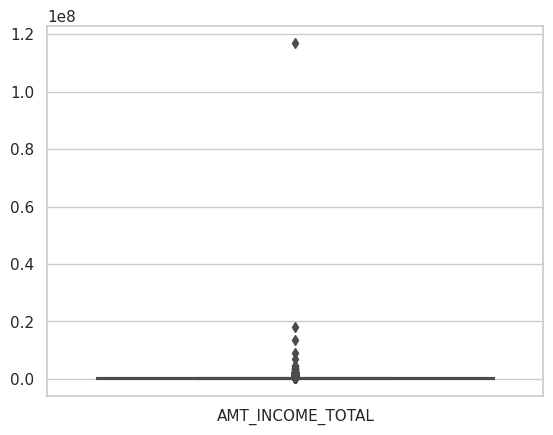

In [ ]:
# สร้าง Spark session
spark = SparkSession.builder.appName("BoxPlotInSpark").getOrCreate()

# สมมติว่าคุณมี Spark DataFrame ชื่อ 'spark_df' ที่มีคอลัมน์ 'AMT_INCOME_TOTAL'
# สร้างกราฟแผนฮ์บอกฮกส์สำหรับ 'AMT_INCOME_TOTAL'
sns.set(style="whitegrid")
sns.boxplot(data=spark_df.select("AMT_INCOME_TOTAL").toPandas())

# แสดงกราฟ
plt.show()


In [ ]:
from pyspark.sql import SparkSession

# สร้าง Spark session
spark = SparkSession.builder.appName("DescribeColumnInSpark").getOrCreate()

# สมมติว่าคุณมี Spark DataFrame ชื่อ 'spark_df' ที่คุณต้องการใช้งาน

# เลือกคอลัมน์ 'AMT_INCOME_TOTAL' และใช้ describe() เพื่อรายละเอียดคอลัมน์
spark_df.select('AMT_INCOME_TOTAL').describe().show()

+-------+------------------+
|summary|  AMT_INCOME_TOTAL|
+-------+------------------+
|  count|            307511|
|   mean|168797.91929698453|
| stddev|237123.14627885324|
|    min|           25650.0|
|    max|            1.17E8|
+-------+------------------+



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


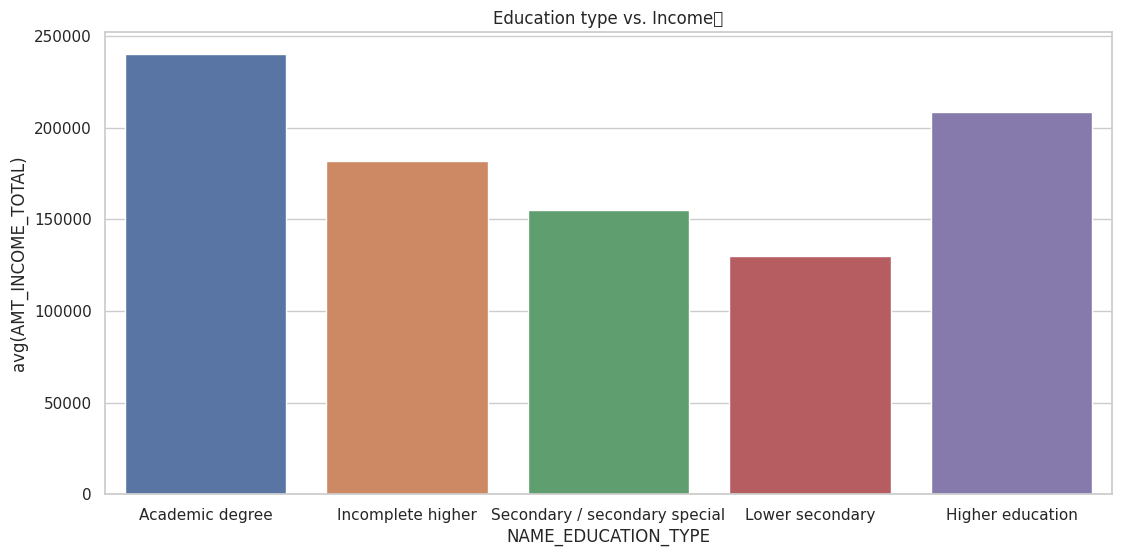

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# สร้าง Spark session
spark = SparkSession.builder.appName("EducationTypeVsIncomeInSpark").getOrCreate()

# สมมติว่าคุณมี Spark DataFrame ชื่อ 'spark_df' และมีคอลัมน์ 'NAME_EDUCATION_TYPE' และ 'AMT_INCOME_TOTAL'

# Import necessary functions from PySpark
from pyspark.sql.functions import col

# สร้างกราฟแท่งสำหรับ "ประเภทการศึกษา vs. รายได้" ใน Spark
plt.figure(figsize=(13, 6))
education_income_data = spark_df.groupBy("NAME_EDUCATION_TYPE").agg({"AMT_INCOME_TOTAL": "avg"}).toPandas()
sns.barplot(x='NAME_EDUCATION_TYPE', y='avg(AMT_INCOME_TOTAL)', data=education_income_data)
plt.title('Education type vs. Income้')
plt.show()

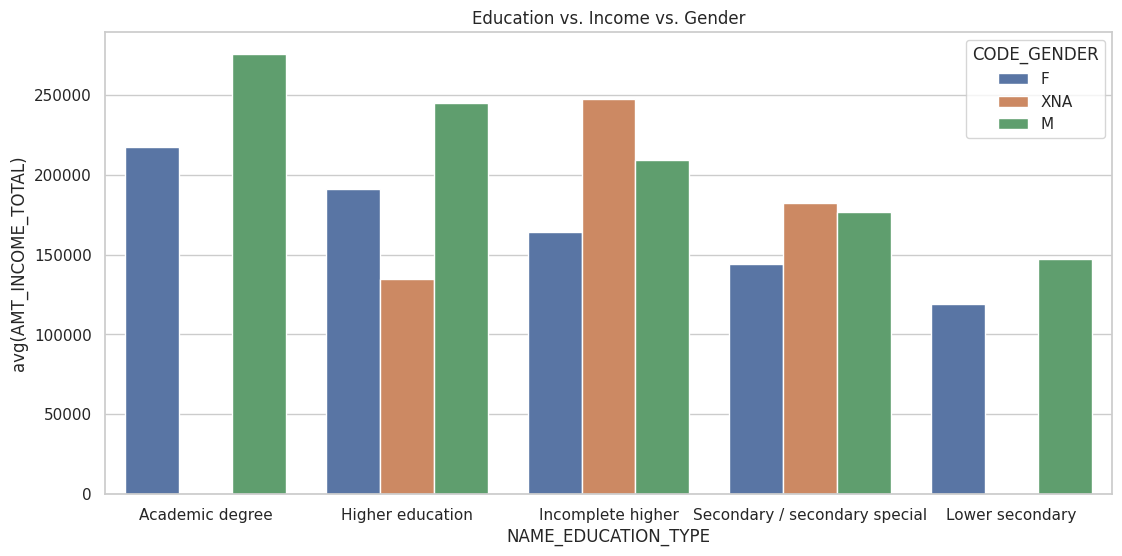

In [ ]:
# สร้างกราฟแท่งสำหรับ "การศึกษา vs. รายได้ vs. เพศ" ใน Spark
plt.figure(figsize=(13, 6))
education_income_gender_data = spark_df.groupBy("NAME_EDUCATION_TYPE", "CODE_GENDER").agg({"AMT_INCOME_TOTAL": "avg"}).toPandas()
sns.barplot(x='NAME_EDUCATION_TYPE', y='avg(AMT_INCOME_TOTAL)', data=education_income_gender_data, hue='CODE_GENDER')
plt.title('Education vs. Income vs. Gender')
plt.show()

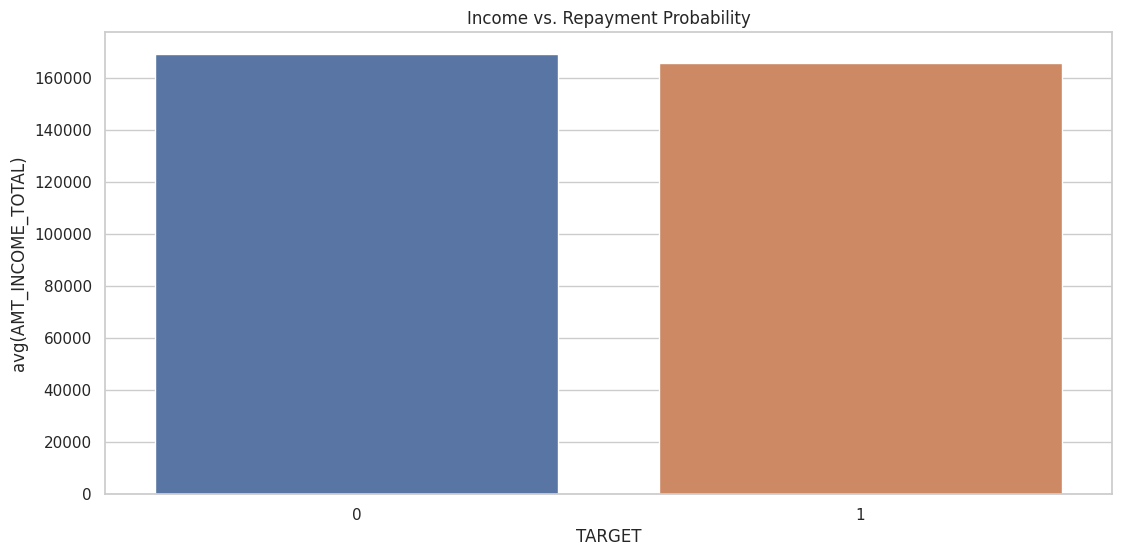

In [ ]:
# สร้างกราฟแท่งสำหรับ "รายได้ vs. ความน่าจะเป็นในการชำระหนี้" ใน Spark
plt.figure(figsize=(13, 6))
income_repayment_data = spark_df.groupBy("TARGET").agg({"AMT_INCOME_TOTAL": "avg"}).toPandas()
sns.barplot(x='TARGET', y='avg(AMT_INCOME_TOTAL)', data=income_repayment_data)
plt.title('Income vs. Repayment Probability')
plt.show()

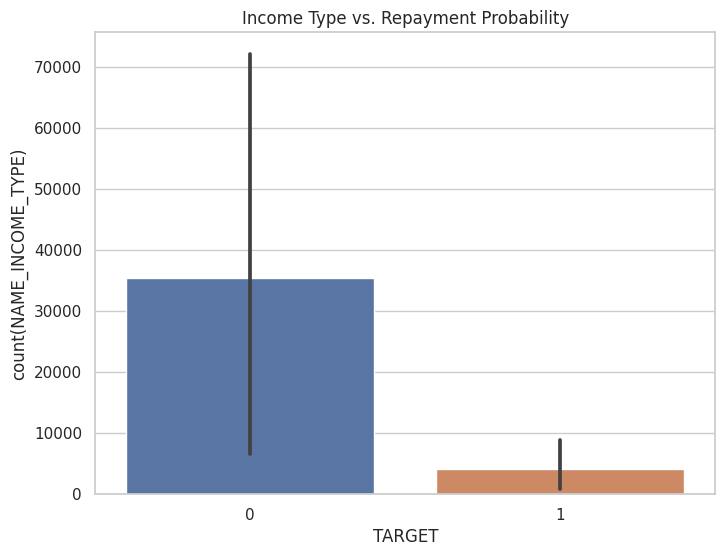

In [ ]:
# สร้างกราฟแท่งสำหรับ "ประเภทรายได้ vs. ความน่าจะเป็นในการชำระหนี้" ใน Spark
plt.figure(figsize=(8, 6))
income_type_repayment_data = spark_df.groupBy("TARGET", "NAME_INCOME_TYPE").agg({"NAME_INCOME_TYPE": "count"}).toPandas()
sns.barplot(x='TARGET', y='count(NAME_INCOME_TYPE)', data=income_type_repayment_data)
plt.title('Income Type vs. Repayment Probability')
plt.show()

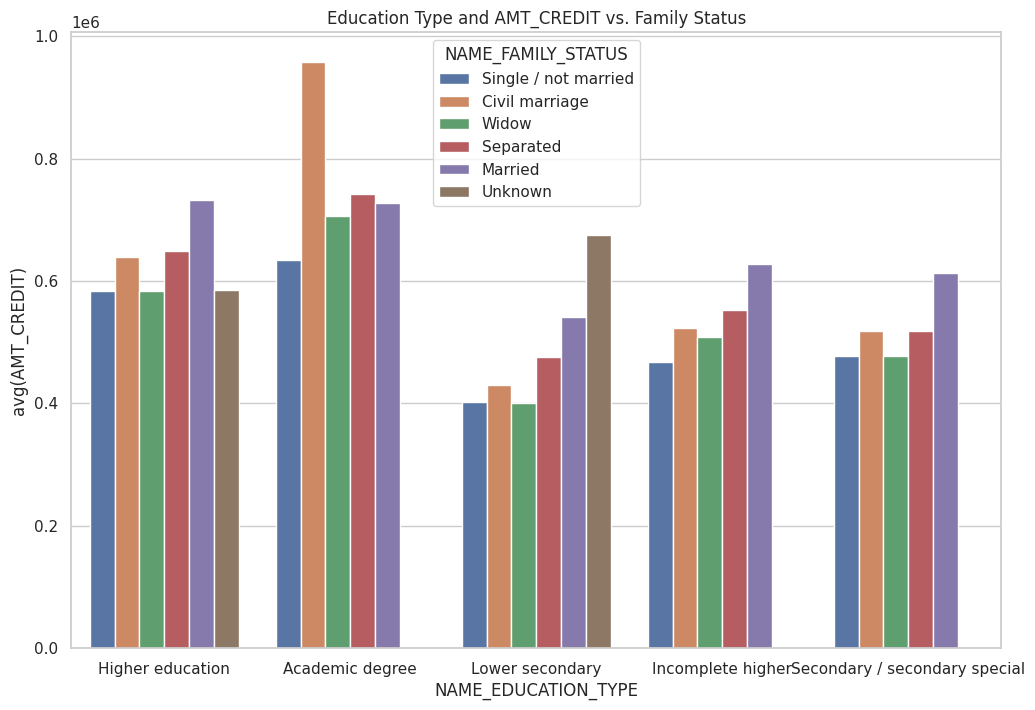

In [ ]:
# สร้างกราฟแท่งสำหรับ "ประเภทการศึกษาและ AMT_CREDIT vs. สถานะครอบครัว" ใน Spark
plt.figure(figsize=(12, 8))
education_credit_family_data = spark_df.groupBy("NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS").agg({"AMT_CREDIT": "avg"}).toPandas()
sns.barplot(data=education_credit_family_data, x='NAME_EDUCATION_TYPE', y='avg(AMT_CREDIT)', hue='NAME_FAMILY_STATUS')
plt.title('Education Type and AMT_CREDIT vs. Family Status')
plt.show()

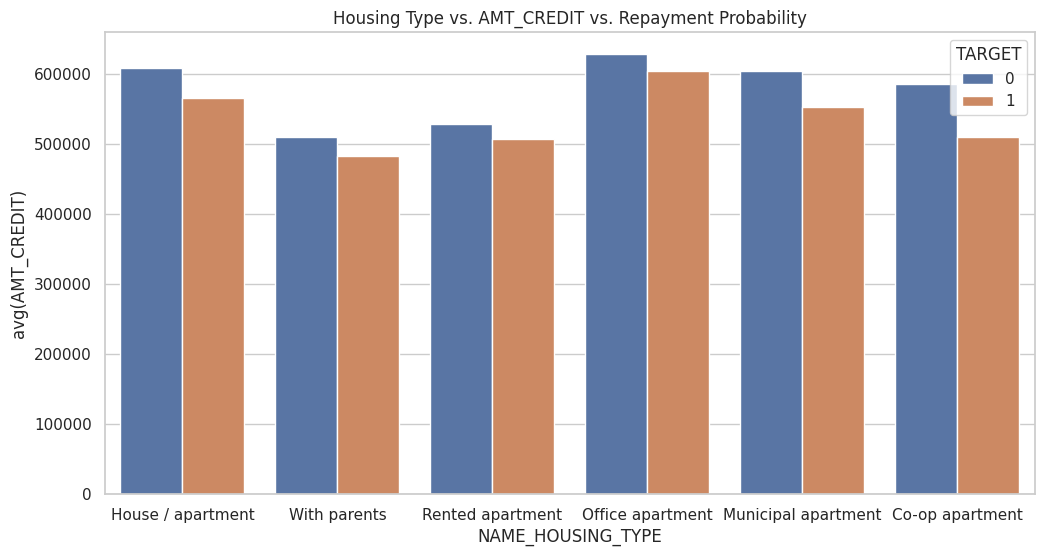

In [ ]:
# สร้างกราฟแท่งสำหรับ "ประเภทที่อยู่ vs. AMT_CREDIT vs. ความน่าจะเป็นในการชำระหนี้" ใน Spark
plt.figure(figsize=(12, 6))
housing_credit_repayment_data = spark_df.groupBy("NAME_HOUSING_TYPE", "TARGET").agg({"AMT_CREDIT": "avg"}).toPandas()
sns.barplot(data=housing_credit_repayment_data, x='NAME_HOUSING_TYPE', y='avg(AMT_CREDIT)', hue='TARGET')
plt.title('Housing Type vs. AMT_CREDIT vs. Repayment Probability')
plt.show()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.sql.types import StringType

# Initialize a Spark session
spark = SparkSession.builder.appName("AgeGroupConversion").getOrCreate()

# Assuming you have a Pandas DataFrame df_app
# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(df_app)

# Define the age groups using Spark DataFrame operations
age_groups = [
    (col("YEARS_BIRTH") >= 20) & (col("YEARS_BIRTH") < 30),
    (col("YEARS_BIRTH") >= 30) & (col("YEARS_BIRTH") < 40),
    (col("YEARS_BIRTH") >= 40) & (col("YEARS_BIRTH") < 50),
    (col("YEARS_BIRTH") >= 50) & (col("YEARS_BIRTH") < 60),
    (col("YEARS_BIRTH") >= 60)
]

age_labels = ['20-30', '30-40', '40-50', '50-60', '>60']

# Create the 'Age_Group' column in the Spark DataFrame
spark_df = spark_df.withColumn("Age_Group", when(age_groups[0], age_labels[0])
    .when(age_groups[1], age_labels[1])
    .when(age_groups[2], age_labels[2])
    .when(age_groups[3], age_labels[3])
    .when(age_groups[4], age_labels[4])
    .otherwise(None)
    .cast(StringType()))

# Show the Spark DataFrame with the 'Age_Group' column
spark_df.show()

# Print the schema of the Spark DataFrame
spark_df.printSchema()


AnalysisException: ignored

In [ ]:
# สร้างกราฟแผนฮ์สำหรับ "Age_Group VS YEARS_EMPLOYED VS TARGET" ใน Spark
plt.figure(figsize=(8, 4))
age_years_employed_target_data = spark_df.groupBy("Age_Group", "TARGET").agg({"YEARS_EMPLOYED": "avg"}).toPandas()
sns.boxplot(data=age_years_employed_target_data, x='Age_Group', y='avg(YEARS_EMPLOYED)', hue='TARGET')
plt.title('Age_Group VS YEARS_EMPLOYED VS TARGET')
plt.show()

In [ ]:
# นับจำนวนแถวใน Spark DataFrame
row_count = spark_df.count()

# หาจำนวนคอลัมน์ใน Spark DataFrame
column_count = len(spark_df.columns)

# แสดงขนาดของ Spark DataFrame
print(f"จำนวนแถว: {row_count}")
print(f"จำนวนคอลัมน์: {column_count}")


In [ ]:
# ใช้ groupBy และ agg เพื่อหาความถี่ของแต่ละค่าในคอลัมน์ 'TARGET'
target_value_counts = spark_df.groupBy("TARGET").agg(count("TARGET").alias("COUNT"))

# แสดงผลลัพธ์
target_value_counts.show()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count
import plotly.express as px

# สร้าง Spark session
spark = SparkSession.builder.appName("TargetValueCountsPieChartInSpark").getOrCreate()

# ใช้ groupBy และ agg เพื่อหาความถี่ของแต่ละค่าในคอลัมน์ 'TARGET'
target_value_counts = spark_df.groupBy("TARGET").agg(count("TARGET").alias("COUNT"))

# แปลงผลลัพธ์เป็น Pandas DataFrame
target_value_counts_pandas = target_value_counts.toPandas()

# สร้างกราฟแผนฮ์
fig = px.pie(target_value_counts_pandas, values='COUNT', names=['0', '1'],
             width=700, height=400, color_discrete_sequence=["skyblue", "black"],
             title="0 vs 1 transactions")

# แสดงกราฟ
fig.show()


In [ ]:
# นับจำนวนรวมของแถวใน DataFrame
total_rows = spark_df.count()

# คำนวณร้อยละของแต่ละค่าในคอลัมน์ 'TARGET'
target_value_percentages = target_value_counts.withColumn("PERCENTAGE", (col("COUNT") / total_rows) * 100)

# แสดงผลลัพธ์
target_value_percentages.show()


#> 1.6 ดูความสัมพันธ์ของข้อมูลต่างๆกับคอลัมน์

In [ ]:
from pyspark.sql import SparkSession

# สร้าง Spark session
spark = SparkSession.builder.appName("DividingDatasetsByTargetInSpark").getOrCreate()

# แบ่ง Spark DataFrame ออกเป็นสอง DataFrame โดยใช้ filter
target0 = spark_df.filter(spark_df["TARGET"] == 0)
target1 = spark_df.filter(spark_df["TARGET"] == 1)

# แสดงข้อมูลของ DataFrame
target0.show()
target1.show()


NameError: ignored

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
import plotly.express as px

# สร้าง Spark session
spark = SparkSession.builder.appName("GenderAnalysisForNoPaymentDifficultiesInSpark").getOrCreate()

# กรองข้อมูลสำหรับ "TARGET" ที่มีค่าเป็น 0 (ไม่มีปัญหาการชำระเงิน)
target0_data = spark_df.filter(spark_df["TARGET"] == 0)

# ใช้ groupBy และ agg เพื่อหาความถี่ของแต่ละค่าในคอลัมน์ 'CODE_GENDER' สำหรับผู้ที่ไม่มีปัญหาการชำระเงิน
gender_value_counts = target0_data.groupBy("CODE_GENDER").agg(count("CODE_GENDER").alias("COUNT"))

# แปลงผลลัพธ์เป็น Pandas DataFrame
gender_value_counts_pandas = gender_value_counts.toPandas()

# สร้างกราฟแผนฮ์
fig = px.pie(gender_value_counts_pandas, values='COUNT', names=gender_value_counts_pandas['CODE_GENDER'],
             title='GENDER OF CLIENTS WITH NO PAYMENT DIFFICULTIES')

# แสดงกราฟ
fig.show()


NameError: ignored

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
import plotly.express as px

# สร้าง Spark session
spark = SparkSession.builder.appName("GenderAnalysisForPaymentDifficultiesInSpark").getOrCreate()

# กรองข้อมูลสำหรับ "TARGET" ที่มีค่าเป็น 1 (มีปัญหาการชำระเงิน)
target1_data = spark_df.filter(spark_df["TARGET"] == 1)

# ใช้ groupBy และ agg เพื่อหาความถี่ของแต่ละค่าในคอลัมน์ 'CODE_GENDER' สำหรับผู้ที่มีปัญหาการชำระเงิน
gender_value_counts = target1_data.groupBy("CODE_GENDER").agg(count("CODE_GENDER").alias("COUNT"))

# แปลงผลลัพธ์เป็น Pandas DataFrame
gender_value_counts_pandas = gender_value_counts.toPandas()

# สร้างกราฟแผนฮ์
fig = px.pie(gender_value_counts_pandas, values='COUNT', names=gender_value_counts_pandas['CODE_GENDER'],
             title='GENDER OF CLIENTS WITH NO PAYMENT DIFFICULTIES')

# แสดงกราฟ
fig.show()


NameError: ignored

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

# สร้าง Spark session
spark = SparkSession.builder.appName("OccupationAnalysisForNoPaymentDifficultiesInSpark").getOrCreate()

# กรองข้อมูลสำหรับ "TARGET" ที่มีค่าเป็น 0 (ไม่มีปัญหาการชำระเงิน)
target0_data = spark_df.filter(spark_df["TARGET"] == 0)

# ใช้ groupBy และ agg เพื่อหาความถี่ของแต่ละค่าในคอลัมน์ 'OCCUPATION_TYPE' สำหรับผู้ที่ไม่มีปัญหาการชำระเงิน
occupation_value_counts = target0_data.groupBy("OCCUPATION_TYPE").agg(count("OCCUPATION_TYPE").alias("COUNT"))

# แปลงผลลัพธ์เป็น Pandas DataFrame
occupation_value_counts_pandas = occupation_value_counts.toPandas()

# สร้างกราฟแท่ง
plt.figure(figsize=(8, 4))
plt.bar(occupation_value_counts_pandas['OCCUPATION_TYPE'], occupation_value_counts_pandas['COUNT'], color='green')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('count')
plt.title('Occupation type with no payment difficulty ')
plt.xticks(rotation=90)
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

# สร้าง Spark session
spark = SparkSession.builder.appName("OccupationAnalysisForPaymentDifficultiesInSpark").getOrCreate()


# กรองข้อมูลสำหรับ "TARGET" ที่มีค่าเป็น 1 (มีปัญหาการชำระเงิน)
target1_data = spark_df.filter(spark_df["TARGET"] == 1)

# ใช้ groupBy และ agg เพื่อหาความถี่ของแต่ละค่าในคอลัมน์ 'OCCUPATION_TYPE' สำหรับผู้ที่มีปัญหาการชำระเงิน
occupation_value_counts = target1_data.groupBy("OCCUPATION_TYPE").agg(count("OCCUPATION_TYPE").alias("COUNT"))

# แปลงผลลัพธ์เป็น Pandas DataFrame
occupation_value_counts_pandas = occupation_value_counts.toPandas()

# สร้างกราฟแท่ง
plt.figure(figsize=(8, 4))
plt.bar(occupation_value_counts_pandas['OCCUPATION_TYPE'], occupation_value_counts_pandas['COUNT'], color='pink')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('count')
plt.title('Occupation type with no payment difficulty ')
plt.xticks(rotation=90)
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count

# สร้าง Spark session
spark = SparkSession.builder.appName("PercentageAnalysisForFamilyStatusWithPaymentDifficultiesInSpark").getOrCreate()


# กรองข้อมูลสำหรับ "TARGET" ที่มีค่าเป็น 1 (มีปัญหาการชำระเงิน)
target1_data = spark_df.filter(spark_df["TARGET"] == 1)

# ใช้ groupBy และ agg เพื่อหาความถี่ของแต่ละค่าในคอลัมน์ 'NAME_FAMILY_STATUS' สำหรับผู้ที่มีปัญหาการชำระเงิน
family_status_value_counts = target1_data.groupBy("NAME_FAMILY_STATUS").agg(count("NAME_FAMILY_STATUS").alias("COUNT"))

# ใช้ groupBy และ agg เพื่อหาความถี่ของแต่ละค่าในคอลัมน์ 'NAME_FAMILY_STATUS' สำหรับทั้งหมด
total_family_status_value_counts = spark_df.groupBy("NAME_FAMILY_STATUS").agg(count("NAME_FAMILY_STATUS").alias("TOTAL_COUNT"))

# รวมผลลัพธ์เข้าด้วยกัน
result_df = family_status_value_counts.join(total_family_status_value_counts, "NAME_FAMILY_STATUS", "inner")

# คำนวณเปอร์เซ็นต์
result_df = result_df.withColumn("PERCENTAGE", (result_df["COUNT"] / result_df["TOTAL_COUNT"]) * 100)

# แสดงผลลัพธ์
result_df.select("NAME_FAMILY_STATUS", "PERCENTAGE").show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

# สร้าง Spark session
spark = SparkSession.builder.appName("PercentageAnalysisForFamilyStatusWithPaymentDifficultiesInSpark").getOrCreate()

# กรองข้อมูลสำหรับ "TARGET" ที่มีค่าเป็น 1 (มีปัญหาการชำระเงิน)
target1_data = spark_df.filter(spark_df["TARGET"] == 1)

# ใช้ groupBy และ agg เพื่อหาความถี่ของแต่ละค่าในคอลัมน์ 'NAME_FAMILY_STATUS' สำหรับผู้ที่มีปัญหาการชำระเงิน
family_status_value_counts = target1_data.groupBy("NAME_FAMILY_STATUS").agg(count("NAME_FAMILY_STATUS").alias("COUNT"))

# ใช้ groupBy และ agg เพื่อหาความถี่ของแต่ละค่าในคอลัมน์ 'NAME_FAMILY_STATUS' สำหรับทั้งหมด
total_family_status_value_counts = spark_df.groupBy("NAME_FAMILY_STATUS").agg(count("NAME_FAMILY_STATUS").alias("TOTAL_COUNT"))

# รวมผลลัพธ์เข้าด้วยกัน
result_df = family_status_value_counts.join(total_family_status_value_counts, "NAME_FAMILY_STATUS", "inner")

# คำนวณเปอร์เซ็นต์
result_df = result_df.withColumn("PERCENTAGE", (result_df["COUNT"] / result_df["TOTAL_COUNT"]) * 100)

# แปลงผลลัพธ์เป็น Pandas DataFrame
result_pandas_df = result_df.select("NAME_FAMILY_STATUS", "PERCENTAGE").toPandas()

# สร้างกราฟแท่งด้วย Matplotlib
plt.figure(figsize=(8, 4))
plt.bar(result_pandas_df['NAME_FAMILY_STATUS'], result_pandas_df['PERCENTAGE'], color='red')
plt.title('Percentage of Family status with payment difficulties')
plt.xlabel('Family Status')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# ดึงชื่อคอลัมน์ทั้งหมดของ DataFrame
column_names = spark_df.columns

# แสดงชื่อคอลัมน์
print(column_names)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# สร้าง Spark session
spark = SparkSession.builder.appName("CorrelationAnalysisInSpark").getOrCreate()

# เลือกคอลัมน์ที่คุณสนใจ
selected_columns = ['AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'YEARS_EMPLOYED', 'YEARS_BIRTH', 'YEARS_REGISTRATION',
                    'CODE_GENDER', 'YEARS_ID_PUBLISH', 'AMT_CREDIT', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT']

# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่คุณสนใจ
selected_df = spark_df.select(selected_columns)

# คำนวณความสัมพันธ์แบบ Pearson
corr = selected_df.stat.corr("AMT_GOODS_PRICE", "AMT_INCOME_TOTAL")
corr_df = selected_df.stat.corr("AMT_INCOME_TOTAL", "AMT_ANNUITY")
# ทำเช่นนี้สำหรับคู่อื่น ๆ ของคอลัมน์ที่คุณสนใจ

# แสดงผลลัพธ์
print(corr, corr_df)  # แสดงผลลัพธ์ของความสัมพันธ์ระหว่างคอลัมน์ที่คุณสนใจ


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# สร้าง Spark session
spark = SparkSession.builder.appName("DataTransformationInSpark").getOrCreate()

# แปลงชื่อคอลัมน์
corr_df = corr_df.select(col("VAR1").alias("VAR1"), col("VAR2").alias("VAR2"), col("CORRELATION").alias("CORRELATION"))

# ลบแถวที่มีค่าว่างในคอลัมน์ 'CORRELATION'
corr_df = corr_df.dropna(subset=["CORRELATION"])

# สร้างคอลัมน์ 'CORR_ABS' ที่มีค่าความสัมพันธ์ที่เป็นบวก
corr_df = corr_df.withColumn("CORR_ABS", col("CORRELATION").cast("double").abs())

# แสดงผลลัพธ์
corr_df.show()


# > 1.7 Data splitting

In [ ]:


# ใช้ orderBy เพื่อจัดเรียงคอลัมน์ 'CORR_ABS' จากมากไปหาน้อย
sorted_corr_df = corr_df.orderBy(col("CORR_ABS").desc())

# แสดงผลลัพธ์ 10 แถวแรก
sorted_corr_df.show(10)

In [ ]:
# Create a Spark session
spark = SparkSession.builder.appName("DropColumns").getOrCreate()

# Assuming you have your data as a DataFrame named "app_data_clean" in PySpark
# Define the list of columns to drop
columns_to_drop = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                   'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                   'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                   'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                   'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# Drop the specified columns
df_data_clean = df_data_clean.drop(*columns_to_drop)